<a href="https://colab.research.google.com/github/silacahyadewiii/Predicting-STDs-Risk/blob/main/Prediction_STD_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Library**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [70]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [71]:
pip install scikit-learn xgboost lightgbm

In [72]:
pd.set_option("display.max_columns", None)

# **EDA**

# **Load Dataset**

In [73]:
aids_df = pd.read_csv('/content/STD Dataset.csv')
aids_df.head()

,S.no,Age,Intimate Partners,"Protection Usage (0: Never, 1: Sometimes, 2: Always)",Symptoms,Location,Education,"STD Testing history (0: No, 1: Yes)",STD Status
0,1,45.0,4,0,0,2,1,1,1
1,2,43.0,4,0,0,2,1,1,1
2,3,39.0,5,0,0,3,1,1,1
3,4,35.0,5,2,0,3,1,0,1
4,5,32.0,1,1,1,2,1,0,0


In [74]:
aids_df.shape

(545, 9)

In [75]:
aids_df.tail(5)

,S.no,Age,Intimate Partners,"Protection Usage (0: Never, 1: Sometimes, 2: Always)",Symptoms,Location,Education,"STD Testing history (0: No, 1: Yes)",STD Status
540,541,36.0,2,0,1,2,0,1,1
541,542,45.0,4,0,0,2,0,1,1
542,543,43.0,4,0,0,3,0,0,0
543,544,39.0,5,0,0,3,0,0,0
544,545,35.0,5,2,0,1,0,1,1


# **New**

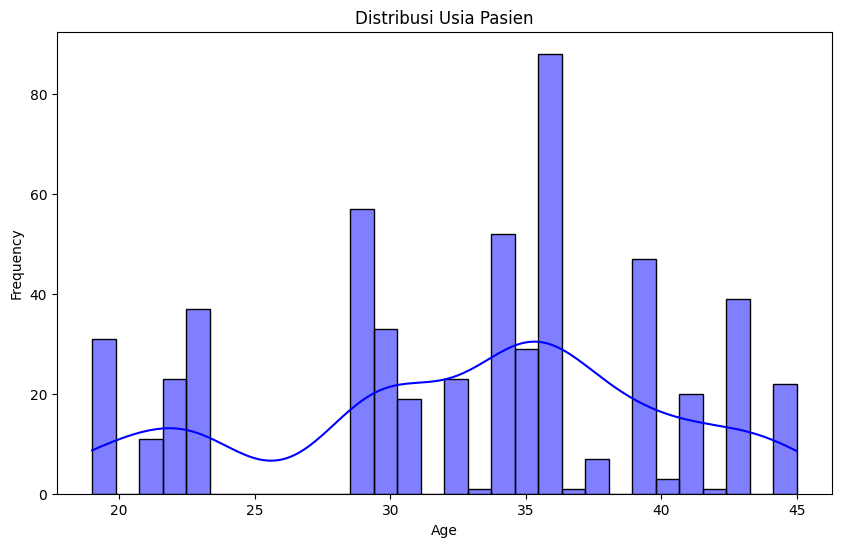

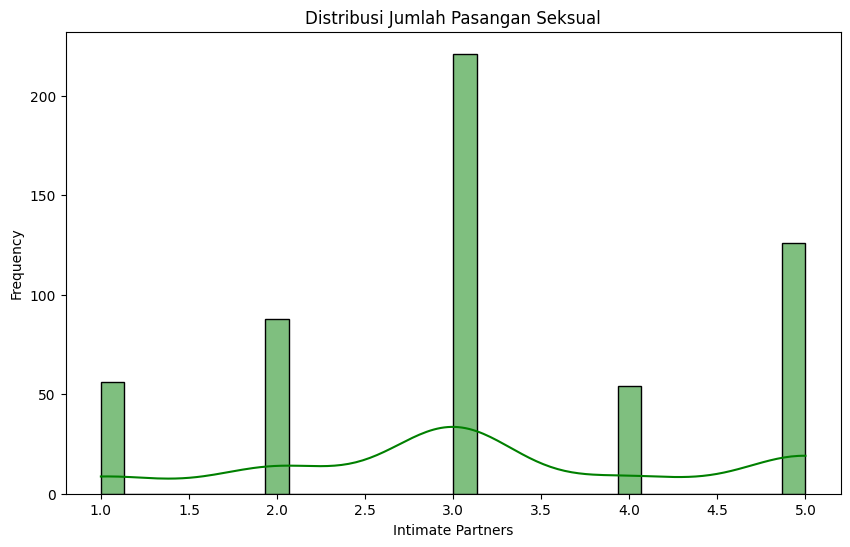

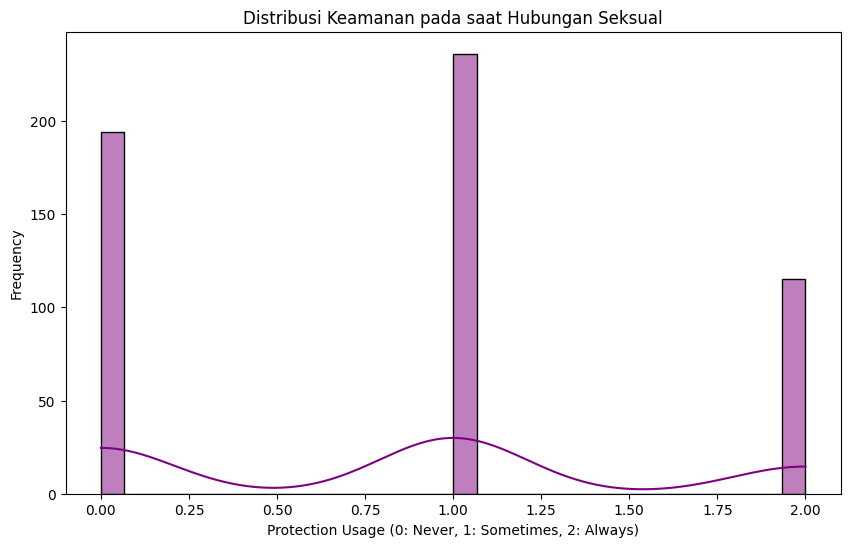

In [76]:
# Distribusi Age
plt.figure(figsize=(10, 6))
sns.histplot(aids_df['Age'], kde=True, bins=30, color='blue')
plt.title('Distribusi Usia Pasien')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribusi Intimate Partners
plt.figure(figsize=(10, 6))
sns.histplot(aids_df['Intimate Partners'], kde=True, bins=30, color='green')
plt.title('Distribusi Jumlah Pasangan Seksual')
plt.xlabel('Intimate Partners')
plt.ylabel('Frequency')
plt.show()

# Distribusi Protection Usage (0: Never, 1: Sometimes, 2: Always)
plt.figure(figsize=(10, 6))
sns.histplot(aids_df['Protection Usage (0: Never, 1: Sometimes, 2: Always)'], kde=True, bins=30, color='purple')
plt.title('Distribusi Keamanan pada saat Hubungan Seksual')
plt.xlabel('Protection Usage (0: Never, 1: Sometimes, 2: Always)')
plt.ylabel('Frequency')
plt.show()

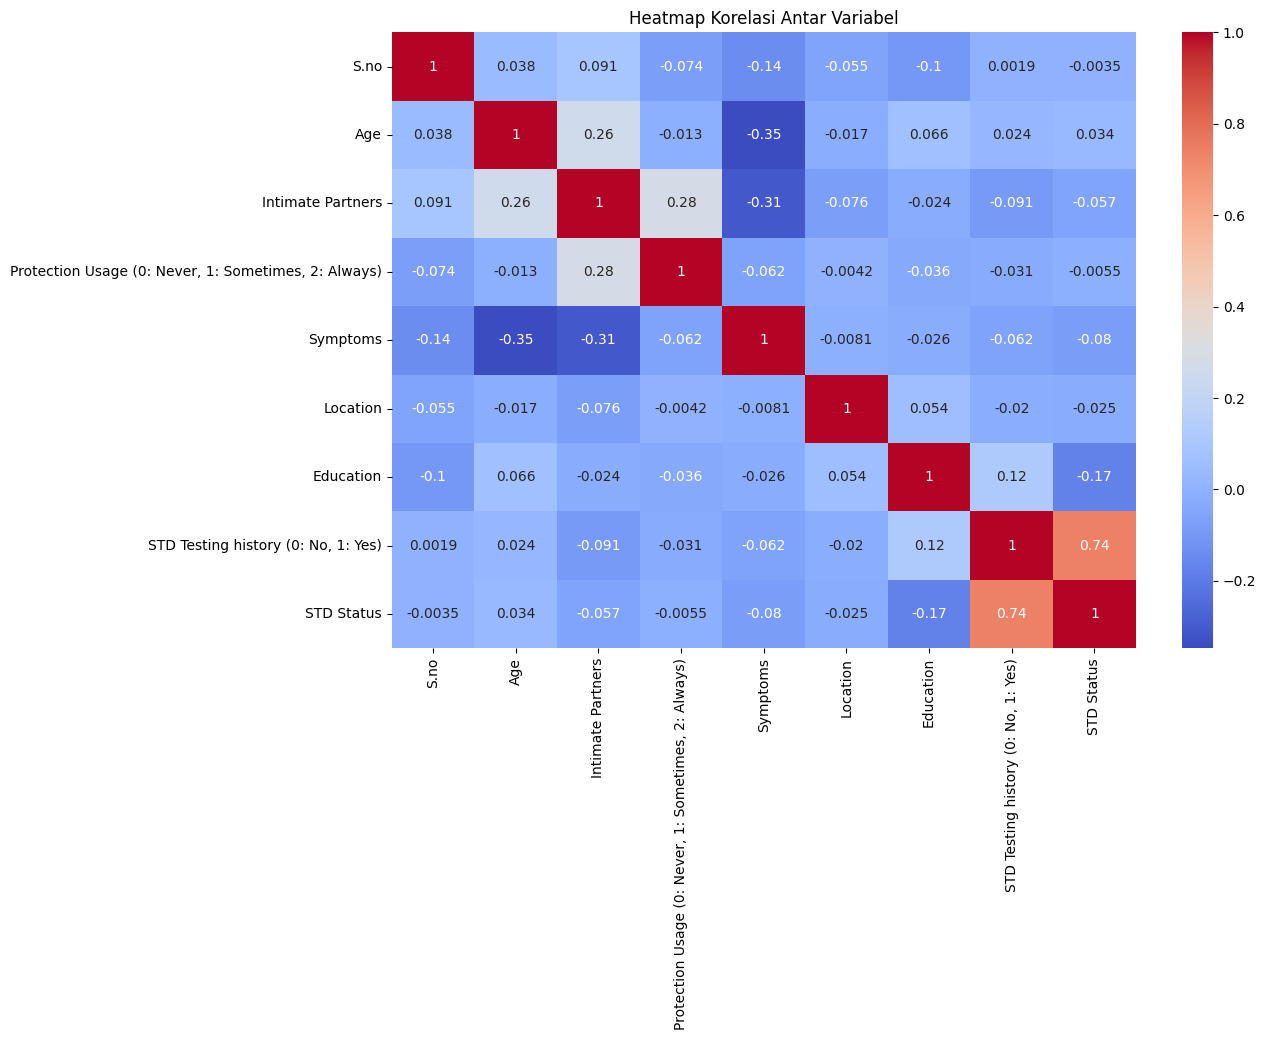

In [77]:
# Korelasi Antar Variabel
plt.figure(figsize=(12, 8))
sns.heatmap(aids_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

# **Seleksi Fitur**

In [78]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
model = RandomForestClassifier(random_state=42)

# Seleksi fitur dengan RFE
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Menampilkan fitur yang terpilih
selected_features = X.columns[rfe.support_]
print("Fitur yang terpilih:", selected_features)


Fitur yang terpilih: Index(['S.no', 'Age', 'Intimate Partners', 'Education',
       'STD Testing history (0: No, 1: Yes)'],
      dtype='object')


## **Checking the types of data**

In [79]:
aids_df.dtypes

,0
S.no,int64
Age,float64
Intimate Partners,int64
"Protection Usage (0: Never, 1: Sometimes, 2: Always)",int64
Symptoms,int64
Location,int64
Education,int64
"STD Testing history (0: No, 1: Yes)",int64
STD Status,int64


## **Encode Target**

In [80]:
aids_df['STD Status'].value_counts()

,count
STD Status,
1,289
0,256


# **Pre-processing**

In [81]:
aids_df.describe()

,S.no,Age,Intimate Partners,"Protection Usage (0: Never, 1: Sometimes, 2: Always)",Symptoms,Location,Education,"STD Testing history (0: No, 1: Yes)",STD Status
count,545.00000,544.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,273.00000,32.930147,3.194495,0.855046,0.552294,2.033028,0.192661,0.528440,0.530275
std,157.47222,7.034164,1.249547,0.739570,0.536806,0.819574,0.394751,0.499649,0.499541
min,1.00000,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.00000,29.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,273.00000,34.000000,3.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000
75%,409.00000,38.000000,4.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000
max,545.00000,45.000000,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000


## **Cek Null**

In [82]:
aids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   S.no                                                  545 non-null    int64  
 1   Age                                                   544 non-null    float64
 2   Intimate Partners                                     545 non-null    int64  
 3   Protection Usage (0: Never, 1: Sometimes, 2: Always)  545 non-null    int64  
 4   Symptoms                                              545 non-null    int64  
 5   Location                                              545 non-null    int64  
 6   Education                                             545 non-null    int64  
 7   STD Testing history (0: No, 1: Yes)                   545 non-null    int64  
 8   STD Status                                            545 non

In [83]:
aids_df.isna().sum()

,0
S.no,0
Age,1
Intimate Partners,0
"Protection Usage (0: Never, 1: Sometimes, 2: Always)",0
Symptoms,0
Location,0
Education,0
"STD Testing history (0: No, 1: Yes)",0
STD Status,0


In [84]:
# Menghapus baris dengan nilai kosong pada kolom 'Age'
aids_df = aids_df.dropna(subset=['Age'])

# Mengisi nilai kosong dengan mean (rata-rata)
aids_df['Age'].fillna(aids_df['Age'].mean(), inplace=True)

# Menyimpan data yang sudah diproses ke dalam file CSV baru
aids_df.to_csv('STD_Clean.csv', index=False)

In [85]:
aids_df.to_csv('/content/STD_Clean.csv')

## **Counting the number of Rows**

In [86]:
aids_df.count()

,0
S.no,544
Age,544
Intimate Partners,544
"Protection Usage (0: Never, 1: Sometimes, 2: Always)",544
Symptoms,544
Location,544
Education,544
"STD Testing history (0: No, 1: Yes)",544
STD Status,544


## **Cek Duplicated**

In [87]:
print(f"Jumlah data: {aids_df.shape[0]}")
print(f"Jumlah data kosong : {aids_df.isna().sum().to_dict()}")
print(f"Jumlah data duplicated : {aids_df.duplicated().sum()}")

Jumlah data: 544
Jumlah data kosong : {'S.no': 0, 'Age': 0, 'Intimate Partners': 0, 'Protection Usage (0: Never, 1: Sometimes, 2: Always)': 0, 'Symptoms': 0, 'Location': 0, 'Education': 0, 'STD Testing history (0: No, 1: Yes)': 0, 'STD Status': 0}
Jumlah data duplicated : 0


# **Detecting Outliers**

Memastikan data diantara rata-rata Normal

In [88]:
Q1 = aids_df.quantile(0.25)
Q3 = aids_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

S.no                                                    271.5
Age                                                       9.0
Intimate Partners                                         2.0
Protection Usage (0: Never, 1: Sometimes, 2: Always)      1.0
Symptoms                                                  1.0
Location                                                  2.0
Education                                                 0.0
STD Testing history (0: No, 1: Yes)                       1.0
STD Status                                                1.0
dtype: float64


In [89]:
aids_df.head()

,S.no,Age,Intimate Partners,"Protection Usage (0: Never, 1: Sometimes, 2: Always)",Symptoms,Location,Education,"STD Testing history (0: No, 1: Yes)",STD Status
0,1,45.0,4,0,0,2,1,1,1
1,2,43.0,4,0,0,2,1,1,1
2,3,39.0,5,0,0,3,1,1,1
3,4,35.0,5,2,0,3,1,0,1
4,5,32.0,1,1,1,2,1,0,0


## **Correlation**

In [90]:
# Convert columns with 'Confidential' to numeric, replacing invalid values with NaN
for column in aids_df.columns:
    if aids_df[column].dtype == 'object':  # Check if column is of type object (string)
        try:
            # Attempt to convert to numeric, replacing 'Confidential' with NaN
            aids_df[column] = pd.to_numeric(aids_df[column].str.replace('Confidential', 'NaN'), errors='coerce')
        except ValueError:
            # If conversion fails, leave the column as is
            pass

# Now calculate the correlation
corr = aids_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,S.no,Age,Intimate Partners,"Protection Usage (0: Never, 1: Sometimes, 2: Always)",Symptoms,Location,Education,"STD Testing history (0: No, 1: Yes)",STD Status
S.no,1.000000,0.038184,0.092492,-0.070863,-0.136823,-0.055209,-0.104583,-0.000659,-0.006127
Age,0.038184,1.000000,0.261207,-0.012969,-0.347668,-0.017152,0.065836,0.024168,0.033645
Intimate Partners,0.092492,0.261207,1.000000,0.282080,-0.306989,-0.076270,-0.023368,-0.090189,-0.055388
"Protection Usage (0: Never, 1: Sometimes, 2: Always)",-0.070863,-0.012969,0.282080,1.000000,-0.064462,-0.004112,-0.035086,-0.028183,-0.002496
Symptoms,-0.136823,-0.347668,-0.306989,-0.064462,1.000000,-0.008054,-0.025217,-0.060574,-0.078108
Location,-0.055209,-0.017152,-0.076270,-0.004112,-0.008054,1.000000,0.054136,-0.020353,-0.025001
Education,-0.104583,0.065836,-0.023368,-0.035086,-0.025217,0.054136,1.000000,0.115822,-0.175298
"STD Testing history (0: No, 1: Yes)",-0.000659,0.024168,-0.090189,-0.028183,-0.060574,-0.020353,0.115822,1.000000,0.738012
STD Status,-0.006127,0.033645,-0.055388,-0.002496,-0.078108,-0.025001,-0.175298,0.738012,1.000000


# **Balancing**

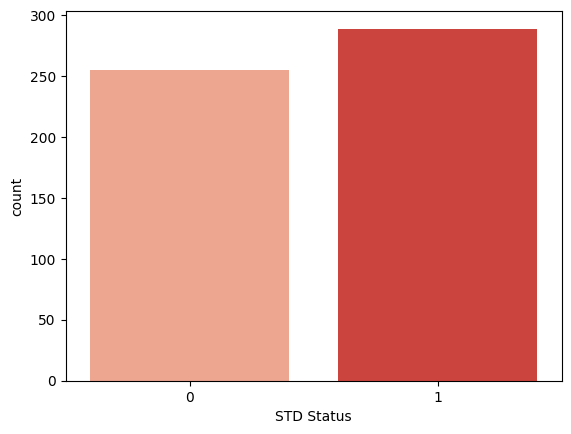

In [91]:
aids_df['STD Status'].value_counts()
sns.countplot(x="STD Status",data=aids_df, palette="Reds")
plt.show()


# **Train-Test-Split**

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # Make sure MinMaxScaler is imported


# Assuming 'aids_df' is your DataFrame and 'infected' is the target column
X = aids_df.drop(columns=['STD Status'])
y = aids_df['STD Status']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the features (X)
x_transform = scaler.fit_transform(X)

# Now you can use x_transform in train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size=0.10, random_state=101)

In [93]:
from sklearn.model_selection import train_test_split

X = aids_df.drop(columns=['STD Status'])
y = aids_df['STD Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

print(f"Data train: {X_train.shape[0]}")
print(f"Data test: {X_test.shape[0]}")


Data train: 435
Data test: 109


# **Modeling**

In [94]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
svc = SVC()
lgr = LogisticRegression()
xgb = XGBClassifier()
lgb = LGBMClassifier()
dst = DecisionTreeClassifier()

models = [rfc, abc, gbc, etc,
         svc, lgr, xgb, lgb, dst]

names = ["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees",
        "Support Vector Machine", "Logistic Regression", "XGBoost", "LightGBM", "DecisionTree"]

[LightGBM] [Info] Number of positive: 258, number of negative: 262
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 214
[LightGBM] [Info] Number of data points in the train set: 520, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496154 -> initscore=-0.015385
[LightGBM] [Info] Start training from score -0.015385
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

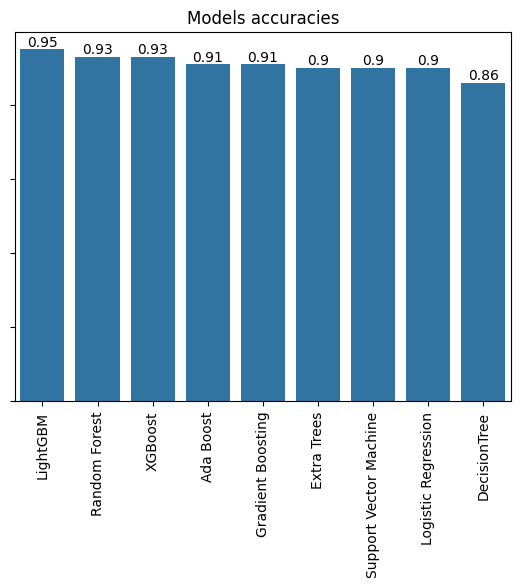

In [95]:
# Define the training function
def training(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Absence', 'Presence'])
    cm = confusion_matrix(y_test, y_pred)

    return score, report, cm

scores, reports, cms = [], dict(), dict()

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE # Make sure SMOTE is imported

# Perform oversampling using SMOTE
oversampler = SMOTE(random_state=101)
x_oversampled, y_oversampled = oversampler.fit_resample(x_transform, y) # Assuming x_transform and y are already defined

# Now use the oversampled data for train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_oversampled, y_oversampled, test_size = .10, random_state = 101)


for i, j in zip(models, names):
    score, report, cm = training(i, x_train, y_train, x_test, y_test)
    scores += [score]
    reports[j] = report
    cms[j] = cm

dd = pd.DataFrame({"scores": scores}, index=names)
dd = dd.sort_values("scores", ascending=False)
dd["scores"] = round(dd["scores"], 2)
fig, axes = plt.subplots()

sns.barplot(x=dd.index, y=dd.iloc[:, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set_yticklabels(())
axes.set_ylabel("")
axes.set_xlabel("")
axes.set_title("Models accuracies")
plt.show()

# **Hyperparameter**

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
import numpy as np

param_dist = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [50, 100, 200],
    'num_leaves': [10, 20, 30],
    'min_data_in_leaf': [1, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}

lgbm = LGBMClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=lgbm, param_distributions=param_dist,
    n_iter=100, cv=5, scoring='f1', n_jobs=-1, verbose=2
)

# Use x_train and y_train which are the oversampled and scaled data
random_search.fit(x_train, y_train)

# Menampilkan Best Score
print("Best Parameters:", random_search.best_params_)
print("Best Score (F1):", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Number of positive: 258, number of negative: 262
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 214
[LightGBM] [Info] Number of data points in the train set: 520, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Best Parameters: {'num_leaves': 10, 'n_estimators': 100, 'min_data_in_leaf': 10, 'learning_rate': 0.1, 'class_weight': 'balanced'}
Best Score (F1): 0.8671361415718376


# **Evaluasi Model**

In [97]:
from lightgbm import LGBMClassifier

print('LightGBM Classifier')
# Create instance of model
lgbm_model = LGBMClassifier(random_state=42)

# Pass training data into model
lgbm_model.fit(x_train, y_train)

LightGBM Classifier
[LightGBM] [Info] Number of positive: 258, number of negative: 262
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 214
[LightGBM] [Info] Number of data points in the train set: 520, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496154 -> initscore=-0.015385
[LightGBM] [Info] Start training from score -0.015385
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

LGBMClassifier(random_state=42)

In [98]:
from sklearn.metrics import accuracy_score

# Prediction from the model
y_pred_lgbm = lgbm_model.predict(x_test)

# Score It

print('LightGBM Classifier')
print('--'*30)
lgbm_accuracy = round(accuracy_score(y_test, y_pred_lgbm) * 100, 2)
print('Accuracy:', lgbm_accuracy, '%')

LightGBM Classifier
------------------------------------------------------------
Accuracy: 94.83 %


LightGBM Classifier
------------------------------------------------------------
Precision: 0.97
Recall: 0.94
F1-score: 0.95
------------------------------------------------------------
[[26  1]
 [ 2 29]]


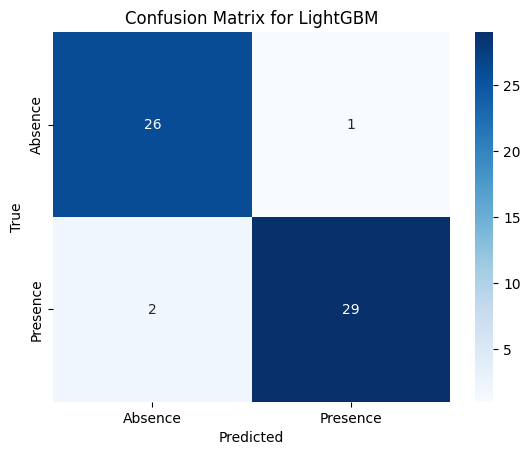

In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Prediction from the model
y_pred_lgbm = lgbm_model.predict(x_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_lgbm)
recall = recall_score(y_test, y_pred_lgbm)
f1 = f1_score(y_test, y_pred_lgbm)

# Print the results
print('LightGBM Classifier')
print('--'*30)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print("--"*30)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_lgbm)
print(confusion)

# Plot confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for LightGBM')
plt.show()

In [100]:
!pip install scikit-learn --upgrade
!pip install xgboost --upgrade

In [101]:
!pip install --upgrade scikit-learn
!pip install --upgrade xgboost


In [102]:
pip install --upgrade scikit-learn xgboost


In [103]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

In [104]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 93.1 %


Precision: 0.97
Recall: 0.90
------------------------------------------------------------


<Axes: >

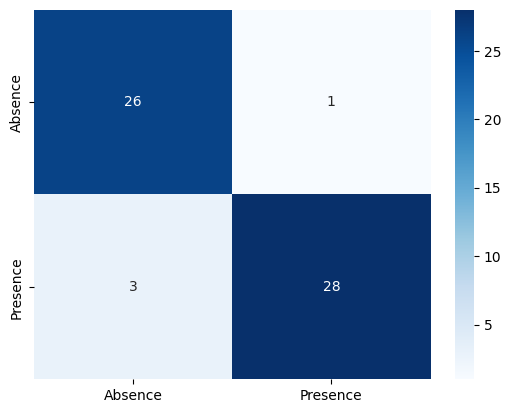

In [105]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])

In [106]:
for i in dd.index:
    print("*"*30)
    print(i)
    print(reports[i])
    print("\n\n")

******************************
LightGBM
              precision    recall  f1-score   support

     Absence       0.93      0.96      0.95        27
    Presence       0.97      0.94      0.95        31

    accuracy                           0.95        58
   macro avg       0.95      0.95      0.95        58
weighted avg       0.95      0.95      0.95        58




******************************
Random Forest
              precision    recall  f1-score   support

     Absence       0.90      0.96      0.93        27
    Presence       0.97      0.90      0.93        31

    accuracy                           0.93        58
   macro avg       0.93      0.93      0.93        58
weighted avg       0.93      0.93      0.93        58




******************************
XGBoost
              precision    recall  f1-score   support

     Absence       0.90      0.96      0.93        27
    Presence       0.97      0.90      0.93        31

    accuracy                           0.93        5

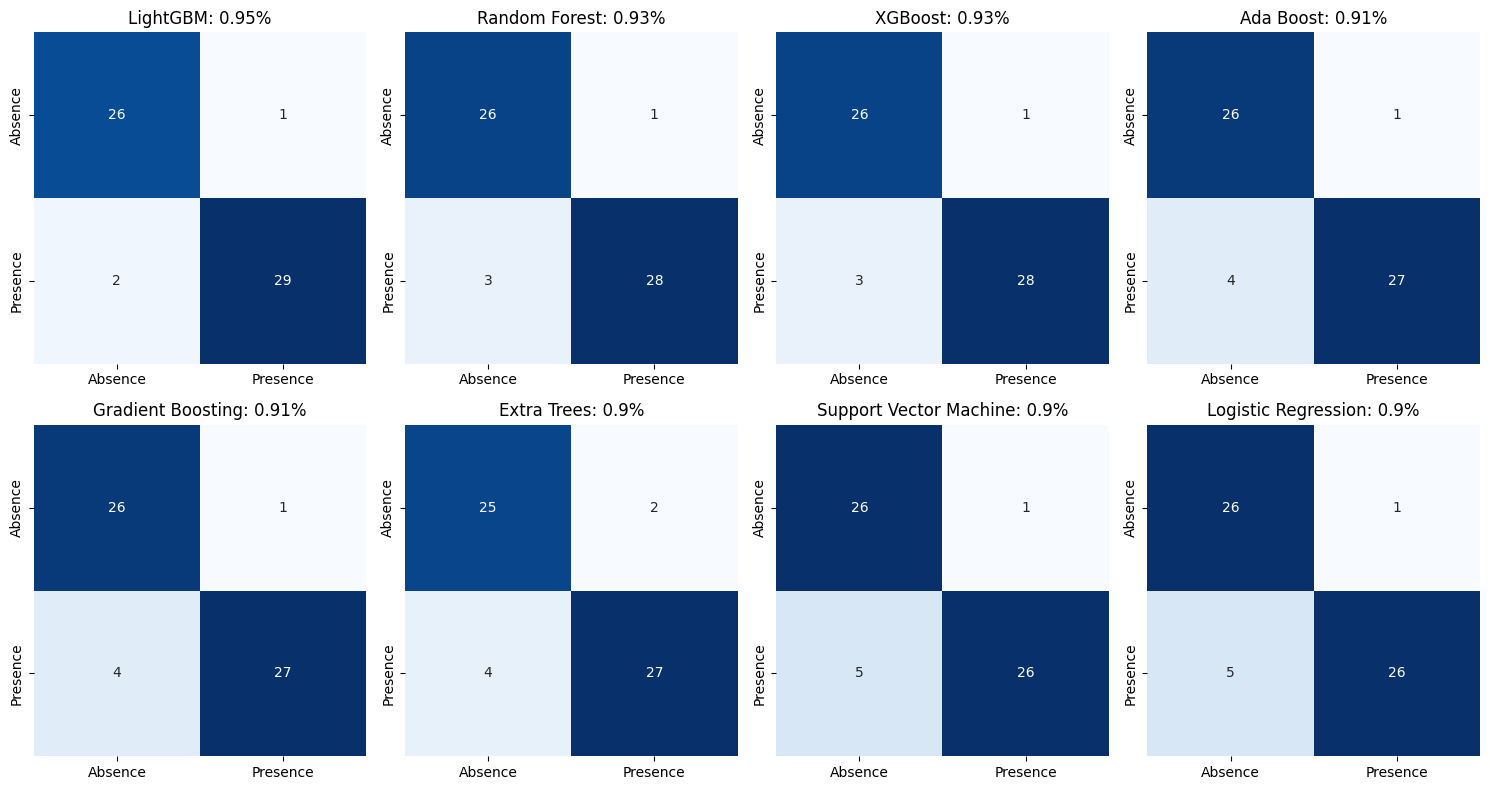

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

index = 0
ncols = 4  # Jumlah kolom per baris
nrows = 2  # Jumlah baris subplot
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))

# Pastikan axes menjadi array 2D untuk konsistensi
axes = axes.flatten()

for ax in axes:
    if index < len(cms):  # Pastikan index tidak melebihi jumlah elemen cms
        sns.heatmap(cms[dd.index[index]], annot=True, fmt='d', ax=ax, cmap="Blues", xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'], cbar=False)  # Tambahkan cbar=False untuk memperbaiki visualisasi
        ax.set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
        index += 1
    else:
        # Kosongkan subplot jika tidak ada data
        ax.axis('off')

plt.tight_layout()
plt.show()


### **Future Important**

In [108]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train) # use the cleaned oversampled data (x_train and y_train)

feature_importance = pd.DataFrame({
    'Feature': X.columns, # Use original features for feature importance
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                                             Feature  Importance
7                STD Testing history (0: No, 1: Yes)    0.504407
0                                               S.no    0.221696
1                                                Age    0.075024
6                                          Education    0.071306
5                                           Location    0.042244
2                                  Intimate Partners    0.037105
3  Protection Usage (0: Never, 1: Sometimes, 2: A...    0.028306
4                                           Symptoms    0.019912


                                             Feature  Importance
7                STD Testing history (0: No, 1: Yes)    0.541615
0                                               S.no    0.189649
6                                          Education    0.083547
1                                                Age    0.063034
5                                           Location    0.042486
2                                  Intimate Partners    0.033988
3  Protection Usage (0: Never, 1: Sometimes, 2: A...    0.027677
4                                           Symptoms    0.018004


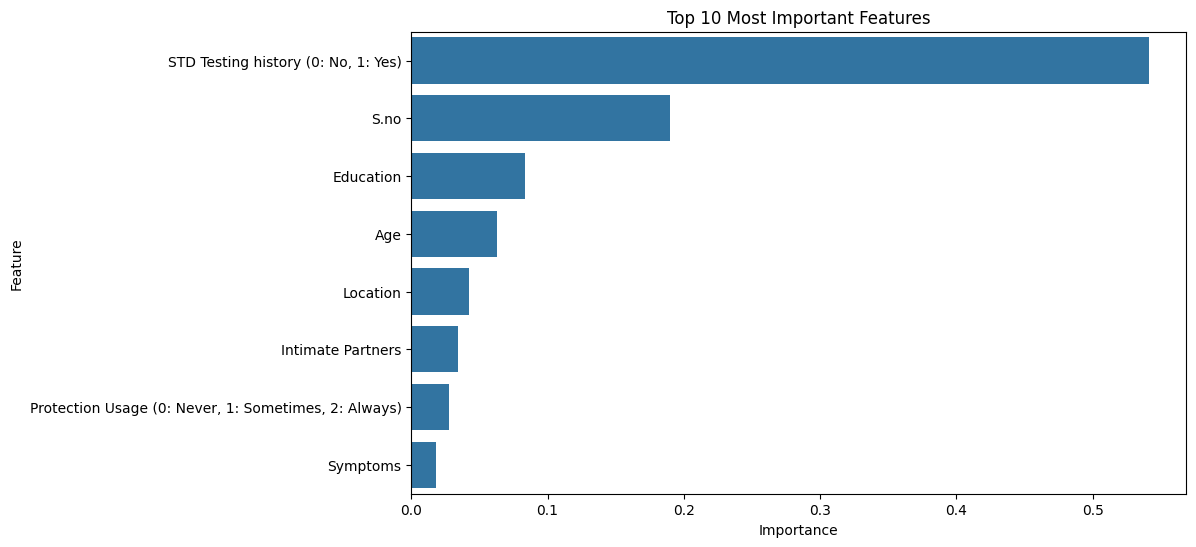

In [109]:
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ext = ExtraTreesClassifier(random_state=42) # Initialize the extra trees model
ext.fit(x_train, y_train) # Train the extra trees model with the cleaned data, assumed x_train and y_train are the cleaned data

# Mendapatkan feature importance
feature_importance_ext = ext.feature_importances_

# Membuat dataframe untuk menampilkan feature importance
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_ext}) # Use original features for feature importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Menampilkan 10 fitur paling penting
print(feature_df.head(10))

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

# ***finish***

# **=================================================================**